In [1]:
#Importing the relevant packages 
# Author - Abhishek De, 7/20
# Checking if the feature selectivity of a cell changes with concentration
# Data acquired from Jane Chen, Palmiter Lab

import numpy as np # required for array operations like multiplication, computing dot products 
import openpyxl    # required for opening the excel files
import matplotlib.pyplot as plt # required for plotting purposes
from scipy import stats         # required for statistics 

In [129]:
# Loading the excel file where the data is stored
# Name of the current file is "example.xlsx"

h= openpyxl.load_workbook("example.xlsx")
data = h["Sheet2"] # Since the data was stored in Sheet 2

In [131]:
# Extracting the lo and hi concentrations

q_low_col = 4 # 4th column of the Sheet, This number can be changed depending on where the user stores the data
na_low_col = 5
s_low_col = 6

q_hi_col = 8
na_hi_col = 9
s_hi_col = 10

LO = []
HI = []
for row in range(3, data.max_row+1):
    
    # Extracting the lo concentrations
    q_low = data.cell(row,q_low_col)
    na_low = data.cell(row,na_low_col)
    s_low = data.cell(row,s_low_col)
    
    # Storing the low concentrations 
    tmp_LO = np.array([q_low.value, na_low.value, s_low.value])
    tmp_LO = tmp_LO / np.linalg.norm(tmp_LO)
    LO.append(tmp_LO)
    
    # Extracting the hi concentrations
    q_hi = data.cell(row,q_hi_col)
    na_hi = data.cell(row,na_hi_col)
    s_hi = data.cell(row,s_hi_col)
    
    # Storing the low concentrations 
    tmp_HI = np.array([q_hi.value, na_hi.value, s_hi.value])
    tmp_HI = tmp_HI / np.linalg.norm(tmp_HI)
    HI.append(tmp_HI)
    

In [132]:
# Storing the dot product

DOT_PRODUCT = [np.sum(LO[k]*HI[k]) for k in range(np.shape(LO)[0])]

In [133]:
# Storing the multiplication numbers 
# Will have 3 lines of numbers instead of 1 line: NOT the dot product
# Let's call it the MULTIPLICATION MATRIX

MULTIPLICATION_MATRIX = [LO[k]*HI[k] for k in range(np.shape(LO)[0])]
MATRIX_MAX_VAL = np.amax(MULTIPLICATION_MATRIX, axis=1)

In [134]:
# A simple Spearman's correlation between the lo and hi concentration values for each cell
# Only storing the correlation values, p-values are not important
CORR_SPEARMAN = [stats.spearmanr(LO[k],HI[k])[0] for k in range(np.shape(LO)[0])]

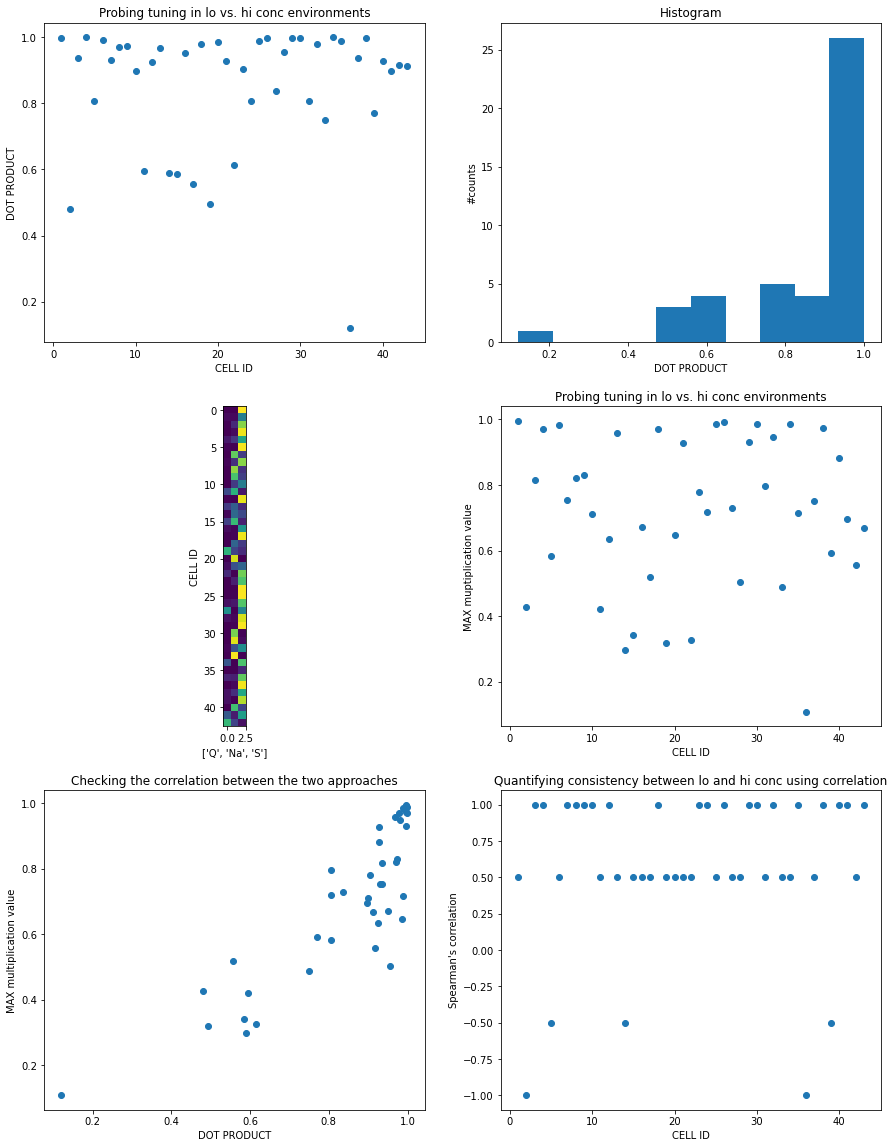

In [135]:
# plotting the results and saving the figure

cell_ID = [k+1 for k in range(np.shape(LO)[0])]
fig = plt.figure(figsize=(15,20))

# Raw scatter plot
plt.subplot(321)
plt.plot(cell_ID,DOT_PRODUCT,'o')
plt.xlabel('CELL ID')
plt.ylabel('DOT PRODUCT')
plt.title(f'Probing tuning in lo vs. hi conc environments')


# Histogram of the DOT PRODUCT values 
counts, bins = np.histogram(DOT_PRODUCT)
plt.subplot(322)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Histogram')
plt.xlabel('DOT PRODUCT')
plt.ylabel(f'#counts')

# A heatmap of the MATRIX MULTIPLICATION DATA
labels = ['Q','Na','S']
plt.subplot(323)
plt.imshow(MULTIPLICATION_MATRIX)
plt.xlabel(labels)
plt.ylabel('CELL ID')

# Pulling out the maximum values from the heatmap
plt.subplot(324)
plt.plot(cell_ID, MATRIX_MAX_VAL,'o')
plt.ylabel('MAX muptiplication value')
plt.xlabel('CELL ID')
plt.title(f'Probing tuning in lo vs. hi conc environments')

# Scatterplot to see if there is any correlation between the DOT_PRODUCT and MULTIPLICATION_MATRIX
plt.subplot(325)
plt.plot(DOT_PRODUCT, MATRIX_MAX_VAL,'o')
plt.xlabel('DOT PRODUCT')
plt.ylabel('MAX multiplication value')
plt.title('Checking the correlation between the two approaches')

# Spearman's correlation test between the hi and lo concentrations 
plt.subplot(326)
plt.plot(cell_ID, CORR_SPEARMAN,'o')
plt.xlabel('CELL ID')
plt.ylabel("Spearman's correlation")
plt.title('Quantifying consistency between lo and hi conc using correlation')

# Saving the figure as a pdf
plt.savefig('ForJane_Analysis.pdf')
plt.savefig('ForJane_Analysis.png')
plt.show()
